# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('MgluR5_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1968,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1969,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1970,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0      -1.556303
1      -3.477121
2      -1.000000
3      -5.477121
4      -5.477121
          ...   
1967   -2.678518
1968   -1.431364
1969   -4.477121
1970   -4.096910
1971   -4.000000
Name: pIC50, Length: 1972, dtype: float64

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(1972, 881)

In [6]:
Y.shape

(1972,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(1972, 149)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((1577, 149), (1577,))

In [11]:
X_test.shape, Y_test.shape

((395, 149), (395,))

## **5. Building a Regression Model using Random Forest**

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.39856355312018854

In [13]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

Original

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

Test-1

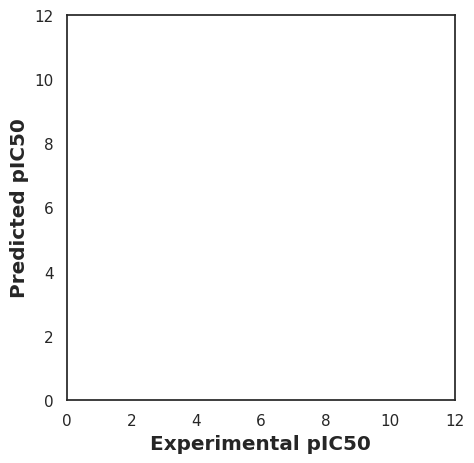

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and Y_pred are arrays or lists containing your data
# Make sure they have the same length
# Also, make sure you've imported necessary libraries and defined Y_test and Y_pred before running this code

sns.set(color_codes=True)
sns.set_style("white")

# Assuming Y_test and Y_pred are arrays or lists containing your data
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

Test-2

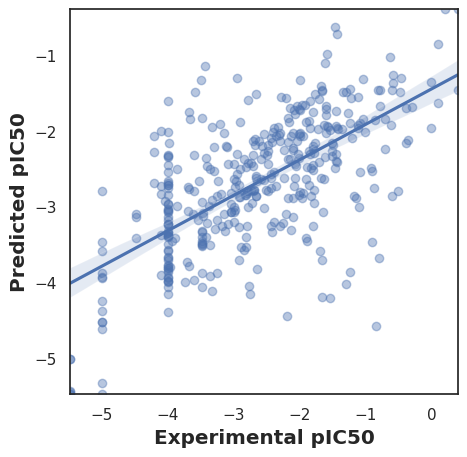

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and Y_pred are arrays or lists containing your data
# Make sure they have the same length
# Also, make sure you've imported necessary libraries and defined Y_test and Y_pred before running this code

sns.set(color_codes=True)
sns.set_style("white")

# Assuming Y_test and Y_pred are arrays or lists containing your data
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

# Adjust limits if necessary
ax.set_xlim(min(Y_test), max(Y_test))
ax.set_ylim(min(Y_pred), max(Y_pred))

ax.figure.set_size_inches(5, 5)
plt.show()
